In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/train_aug_resize.zip -d /content/

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a441257_3.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a441259.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a441259_1.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a441259_2.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a441259_3.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a44125a.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a44125a_1.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a44125a_2.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a44125a_3.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a44125b.png  
  inflating: /content/train_a

In [3]:
!unzip /content/drive/MyDrive/val_resize.zip -d /content/

Archive:  /content/drive/MyDrive/val_resize.zip
   creating: /content/val_resize/
  inflating: /content/val_resize/18-142_PAS_1of6_647e17ac435c92704a564fe8.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a39934f.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a399351.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a39935a.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a399362.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a39937e.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a399384.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a399388.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a39938d.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a39938e.png  
  inflating: /content/val_resize/18-142_PAS_3of6_64551bc4435c92704a39b4a6.png  
  inflating: /content/val_resize/18-14

In [4]:
!unzip /content/drive/MyDrive/test_resize.zip -d /content/

Archive:  /content/drive/MyDrive/test_resize.zip
   creating: /content/test_resize/
  inflating: /content/test_resize/18-142_PAS_1of6_647e17ac435c92704a564fee.png  
  inflating: /content/test_resize/18-142_PAS_1of6_647e17ac435c92704a564ffb.png  
  inflating: /content/test_resize/18-142_PAS_1of6_647e17ac435c92704a565001.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a399336.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a399337.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a39933a.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a399363.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a39936b.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a39936d.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a39936f.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a399375.png  
  inflating: /content/tes

In [2]:
pip install torch torchvision timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.5 MB/s eta 0:00:00


In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import pandas as pd
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torch.optim import Adam
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from torchvision.models import resnet152, ResNet152_Weights
import torch.nn.functional as F
from timm import create_model

In [7]:
class ImageDataset(Dataset):
    def __init__(self, img_folder, csv_file, transform=None):
        self.img_folder = img_folder
        self.df = pd.read_csv(csv_file)
        self.transform = transform


        self.image_labels = {self.get_original_name(row['name']): row['ground truth'] for _, row in self.df.iterrows()}

    def __len__(self):
        return len(os.listdir(self.img_folder))

    def __getitem__(self, idx):
        img_name = os.listdir(self.img_folder)[idx]
        img_path = os.path.join(self.img_folder, img_name)


        original_name = self.get_original_name(img_name)


        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)


        if original_name in self.image_labels:
            label = self.image_labels[original_name]
        else:

            raise ValueError(f"Label for image {original_name} not found in CSV file.")

        return image, label

    def get_original_name(self, filename):
        # Check if the filename ends with _1, _2, or _3, and remove it if present
        if filename.endswith('_1.png') or filename.endswith('_2.png') or filename.endswith('_3.png'):
            original_name = filename.rsplit('_', 1)[0] + '.png'
        else:
            original_name = filename
        return original_name

In [9]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


train_dataset = ImageDataset(img_folder='train_aug_resize', csv_file='/content/public.csv', transform=transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)


val_dataset = ImageDataset(img_folder='val_resize', csv_file='/content/public.csv', transform=transform)


val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = ImageDataset(img_folder='test_resize', csv_file='/content/public.csv', transform=transform)


test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:

class EarlyStopping:
    def __init__(self, patience=15, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0


def get_swin_model():
    model = create_model('swin_base_patch4_window7_224', pretrained=True, num_classes=2)
    return model


def train_swin_transformer(train_loader, val_loader, num_epochs=50, lr=0.0001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


    model = get_swin_model()
    model.to(device)


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)


    early_stopping = EarlyStopping(patience=15, min_delta=0.001)

    train_losses, val_losses, val_aucs = [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)


        model.eval()
        val_running_loss = 0.0
        all_labels, all_preds = [], []
        with torch.no_grad():
            for val_images, val_labels in val_loader:
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                val_outputs = model(val_images)
                val_loss = criterion(val_outputs, val_labels)
                val_running_loss += val_loss.item() * val_images.size(0)
                preds = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()
                all_preds.extend(preds)
                all_labels.extend(val_labels.cpu().numpy())

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)
        val_auc = roc_auc_score(all_labels, all_preds)
        val_aucs.append(val_auc)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val AUC: {val_auc:.4f}")

        early_stopping(val_auc)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break


    plt.figure(figsize=(10, 8))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()


    plt.figure(figsize=(10, 8))
    plt.plot(range(1, len(val_aucs) + 1), val_aucs, label='Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid()
    plt.show()

    return model

# **Swin Transformer Model 1**

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

Epoch [1/300], Train Loss: 0.0984, Val Loss: 0.0288, Val AUC: 0.9993
Epoch [2/300], Train Loss: 0.0386, Val Loss: 0.0868, Val AUC: 0.9994
Epoch [3/300], Train Loss: 0.0166, Val Loss: 0.0456, Val AUC: 0.9994
Epoch [4/300], Train Loss: 0.0110, Val Loss: 0.0164, Val AUC: 0.9998
Epoch [5/300], Train Loss: 0.0069, Val Loss: 0.0710, Val AUC: 0.9998
Epoch [6/300], Train Loss: 0.0044, Val Loss: 0.0694, Val AUC: 0.9997
Epoch [7/300], Train Loss: 0.0001, Val Loss: 0.0455, Val AUC: 0.9998
Epoch [8/300], Train Loss: 0.0000, Val Loss: 0.0347, Val AUC: 0.9998
Epoch [9/300], Train Loss: 0.0000, Val Loss: 0.0398, Val AUC: 0.9998
Epoch [10/300], Train Loss: 0.0000, Val Loss: 0.0428, Val AUC: 0.9998
Epoch [11/300], Train Loss: 0.0000, Val Loss: 0.0435, Val AUC: 0.9998
Epoch [12/300], Train Loss: 0.0000, Val Loss: 0.0339, Val AUC: 0.9998
Epoch [13/300], Train Loss: 0.0000, Val Loss: 0.0446, Val AUC: 0.9998
Epoch [14/300], Train Loss: 0.0000, Val Loss: 0.0472, Val AUC: 0.9998
Epoch [15/300], Train Loss: 0

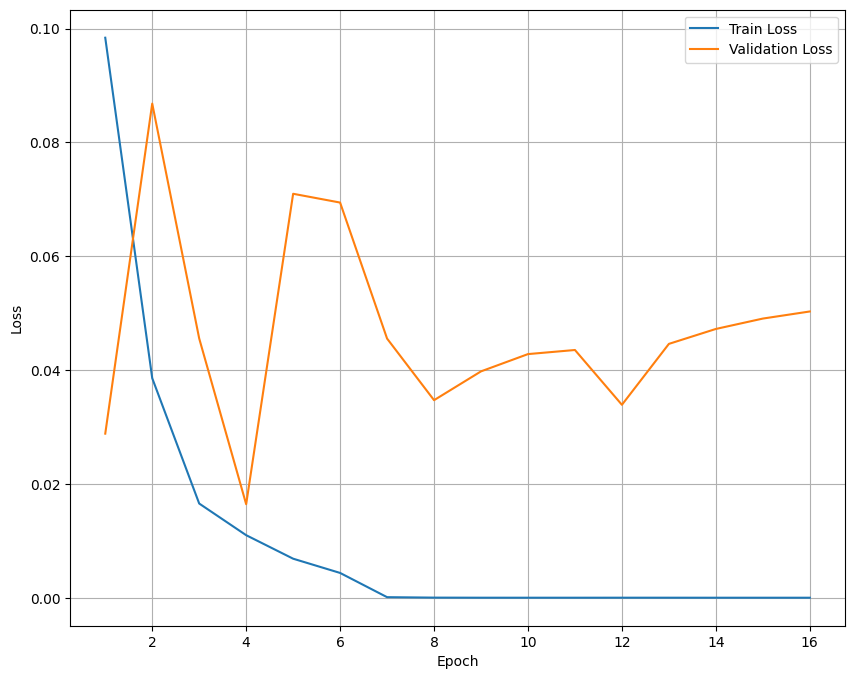

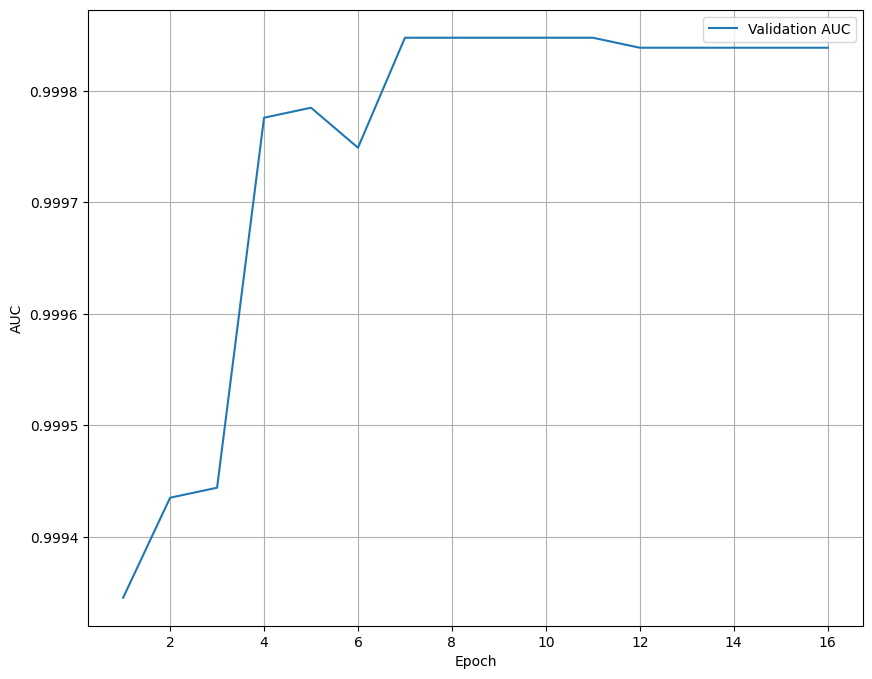

In [ ]:
model = train_swin_transformer(train_loader, val_loader, num_epochs=300, lr=0.0001)

In [ ]:
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test_running_loss = 0.0
all_labels = []
all_probs = []


model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item() * images.size(0)


        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.cpu().numpy())


test_loss = test_running_loss / len(test_loader.dataset)


all_probs_np = np.array(all_probs)
test_auc = roc_auc_score(all_labels, all_probs_np[:, 1])


predicted_labels = np.argmax(all_probs_np, axis=1)
precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, predicted_labels, average='binary')
cm = confusion_matrix(all_labels, predicted_labels)


print(f'Test Loss: {test_loss:.4f}')
print(f'Test AUC: {test_auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Confusion Matrix: \n{cm}')


Test Loss: 0.0647
Test AUC: 0.9987
Precision: 0.9568
Recall: 0.9748
F1 Score: 0.9657
Confusion Matrix: 
[[699   7]
 [  4 155]]




1.  Swin Transformer result：
*   Test Loss: 0.0647
*   Test AUC: 0.9987
*   Precision: 0.9568
*   Recall: 0.9748
*   F1 Score: 0.9657
*   Confusion Matrix:
            [[699   7]
            [ 4  155]]

2.   Optimal ViT result:
*   Precision: 0.9563
*   Recall: 0.9623
*   F1 Score: 0.9592
*   Confusion Matrix:
            [[699   7]
            [ 6  153]]

3.   Optimal ResNet152 result:
*   Test Loss: 0.0954
*   Test AUC: 0.9972
*   Precision: 0.9398
*   Recall: 0.9811
*   F1 Score: 0.9600
*   Confusion Matrix:
            [[696  10]
            [ 3  156]]

The Swin Transformer immediately demonstrated excellent performance, surpassing both ViT and ResNet152. By combining the global information modeling of ViT with the local feature extraction strengths of convolutional networks, it significantly improved overall model performance. Notably, it excelled at reducing false positives while maintaining a strong balance between Recall and Precision. The exceptionally low Test Loss and high AUC further validate the model's stability and robust generalization capabilities. This makes Swin Transformer the optimal choice for this dataset, with room for potential improvement through further hyperparameter tuning.




前面的ResNet152和ViT模型都实验证明了调整参数calss weight，focal loss等都没有Adjust the Decision Threshold效果好。因此优先使用Adjust the Decision Threshold来优化模型

# **Swin Transformer Model 2**
To avoid continuing with the results from the previous ResNet152 Model 4, the session needs to be restarted, and the execution should begin again from the data loading step.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

Epoch [1/300], Train Loss: 0.1026, Val Loss: 0.0136, Val AUC: 0.9999
Epoch [2/300], Train Loss: 0.0312, Val Loss: 0.0432, Val AUC: 0.9999
Epoch [3/300], Train Loss: 0.0172, Val Loss: 0.0189, Val AUC: 0.9998
Epoch [4/300], Train Loss: 0.0122, Val Loss: 0.0212, Val AUC: 0.9998
Epoch [5/300], Train Loss: 0.0078, Val Loss: 0.1729, Val AUC: 0.9997
Epoch [6/300], Train Loss: 0.0065, Val Loss: 0.0206, Val AUC: 0.9999
Epoch [7/300], Train Loss: 0.0080, Val Loss: 0.0234, Val AUC: 0.9999
Epoch [8/300], Train Loss: 0.0010, Val Loss: 0.0377, Val AUC: 0.9998
Epoch [9/300], Train Loss: 0.0091, Val Loss: 0.0603, Val AUC: 0.9997
Epoch [10/300], Train Loss: 0.0001, Val Loss: 0.0477, Val AUC: 0.9998
Epoch [11/300], Train Loss: 0.0000, Val Loss: 0.0445, Val AUC: 0.9998
Epoch [12/300], Train Loss: 0.0000, Val Loss: 0.0479, Val AUC: 0.9998
Epoch [13/300], Train Loss: 0.0215, Val Loss: 0.0332, Val AUC: 0.9999
Epoch [14/300], Train Loss: 0.0083, Val Loss: 0.0512, Val AUC: 0.9992
Epoch [15/300], Train Loss: 0

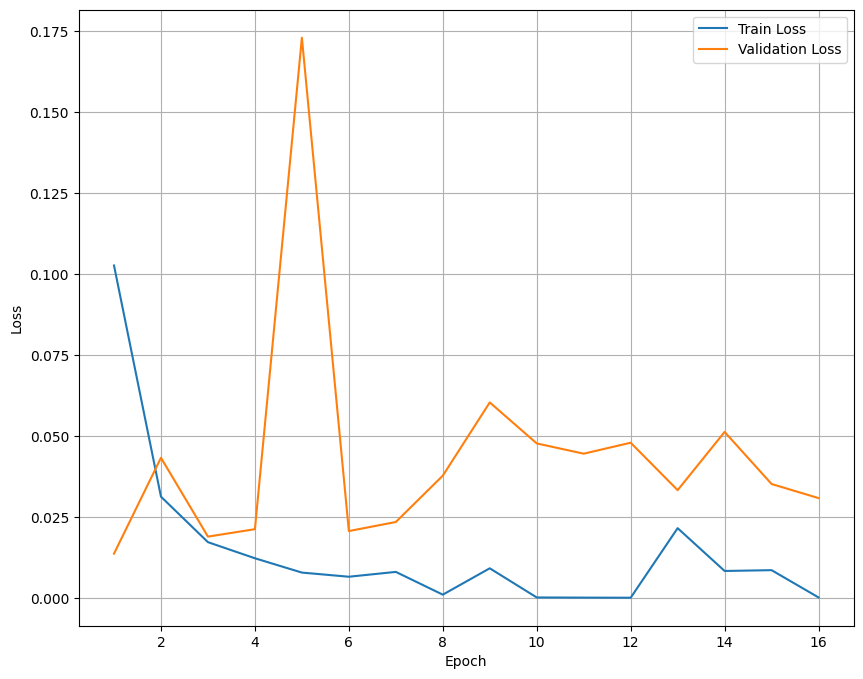

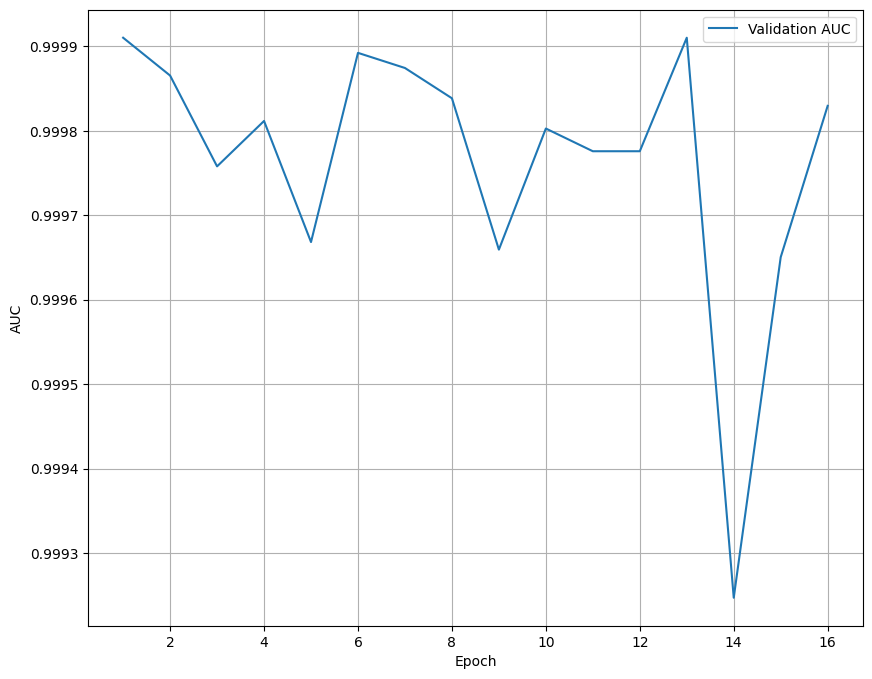

In [11]:
model = train_swin_transformer(train_loader, val_loader, num_epochs=300, lr=0.0001)
torch.save(model.state_dict(), 'swin_transformer_best.pth')

Test Loss: 0.0479, Test AUC: 0.9996
Best threshold: 0.9885, corresponding F1 Score: 0.9875


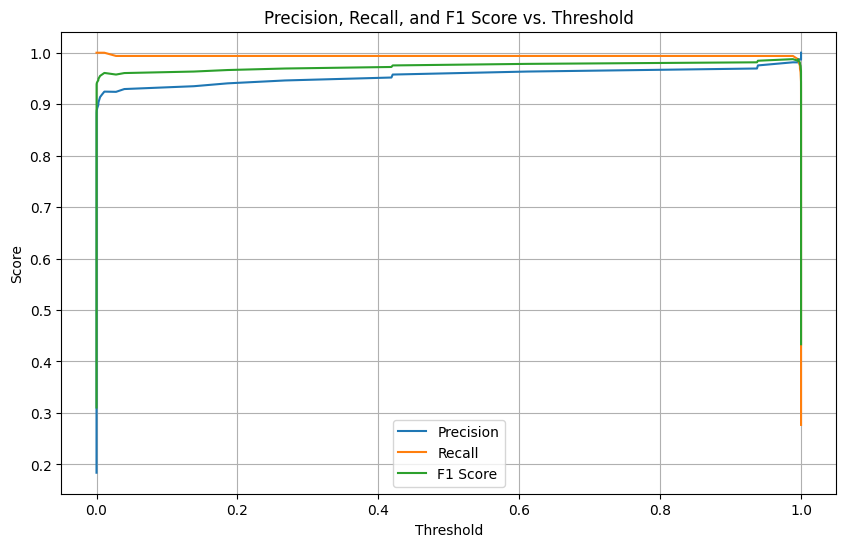

Confusion Matrix:
[[703   3]
 [  1 158]]
Precision: 0.9814
Recall: 0.9937
F1 Score: 0.9875


In [12]:
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support, confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def evaluate_thresholds(model, test_loader, device):
    model.eval()
    all_labels = []
    all_probs = []
    test_loss = 0.0
    criterion = nn.CrossEntropyLoss()


    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)

            probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(labels.cpu().numpy())


    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)


    precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)


    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


    best_threshold_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_threshold_idx]
    best_f1 = f1_scores[best_threshold_idx]


    test_loss /= len(test_loader.dataset)
    test_auc = roc_auc_score(all_labels, all_probs)

    print(f"Test Loss: {test_loss:.4f}, Test AUC: {test_auc:.4f}")
    print(f"Best threshold: {best_threshold:.4f}, corresponding F1 Score: {best_f1:.4f}")


    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], label="Precision")
    plt.plot(thresholds, recalls[:-1], label="Recall")
    plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
    plt.title("Precision, Recall, and F1 Score vs. Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.show()


    return best_threshold, test_loss, test_auc


def apply_best_threshold(model, test_loader, device, best_threshold):
    model.eval()
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(labels.cpu().numpy())

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)


    predicted_labels = (all_probs >= best_threshold).astype(int)


    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, predicted_labels, average='binary')
    cm = confusion_matrix(all_labels, predicted_labels)

    print(f"Confusion Matrix:\n{cm}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


best_threshold, test_loss, test_auc = evaluate_thresholds(model, test_loader, device)


apply_best_threshold(model, test_loader, device, best_threshold)


With an optimal threshold of 0.9985, the Swin Transformer achieved the highest F1 Score of 0.9875, reflecting a perfect balance between precision and recall. Specifically, the model reached a precision of 0.9814 with only 2 false positives, indicating that there were almost no misclassifications when predicting positive cases. The recall of 0.9937 shows that only 1 positive sample was missed, further demonstrating the model's robustness in identifying positive cases. With a confusion matrix of [[703, 3], [1, 158]], Swin Transformer significantly reduced both false negatives and false positives. By fine-tuning the threshold, the model achieved an optimal trade-off between precision and recall, showcasing its strong capability to capture both global and local features effectively.

In medical image classification, doctors can adjust the threshold based on the severity of the disease. For instance, in cases where the risk of missing a diagnosis is high, lowering the threshold can improve recall to ensure that no lesions are overlooked. Conversely, when reducing misdiagnoses is the priority, a higher precision can be emphasized by increasing the threshold. The adjustable threshold of Swin Transformer allows it to be flexibly applied across different medical scenarios. Moreover, patient variability often requires personalized diagnosis, and the robustness of Swin Transformer ensures accuracy even in complex cases, supporting personalized healthcare.






